### Overview
The notebook works with dataset, containing information about Students Performance in exam.

### Goals
* Identification of clusters of excellent, good and poor performing students, using K-Means algorithm
* Comparision of exam results of the students from each cluster
* Visualization of excellent performance cluster characteristics

In [2]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


students_data = pd.read_csv("C:/Users/PC/Downloads/UseforWekaAndRapidminer (2).csv")
students_data.head()

,No,Full Name,Student ID,Email,Class,Major,Semester GPA,Cumulative GPA,Evaluation
0,1,PHAN VAN BINH,22074523,22074523@vnu.edu.vn,BDA2022B,Business Data Analytics,3.33,3.67,Excellent
1,2,VU LINH HOA,23071054,23071054@vnu.edu.vn,MIS2023A,Management Information System,3.75,3.05,Good
2,3,LE THI TRAM,21075679,21075679@vnu.edu.vn,AAI2021B,Automation and Informatics,0.80,1.28,Poor
3,4,NGO THI NGOC HA,23070797,23070797@vnu.edu.vn,IB2023B,International Business,3.76,3.76,Excellent
4,5,PHAM VAN HUNG,21074687,21074687@vnu.edu.vn,AAI2021A,Automation and Informatics,1.55,1.12,Poor


#### K-Means algorithm
Identifying clusters

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Centroids of the clusters are:
Centroid 0: Semester GPA = 1.5190217391304348, Cumulative GPA = 1.4647826086956524
Centroid 1: Semester GPA = 3.03184, Cumulative GPA = 3.46008
Centroid 2: Semester GPA = 3.614950495049505, Cumulative GPA = 3.417128712871287
Centroid 3: Semester GPA = 2.820705882352941, Cumulative GPA = 2.7132941176470586


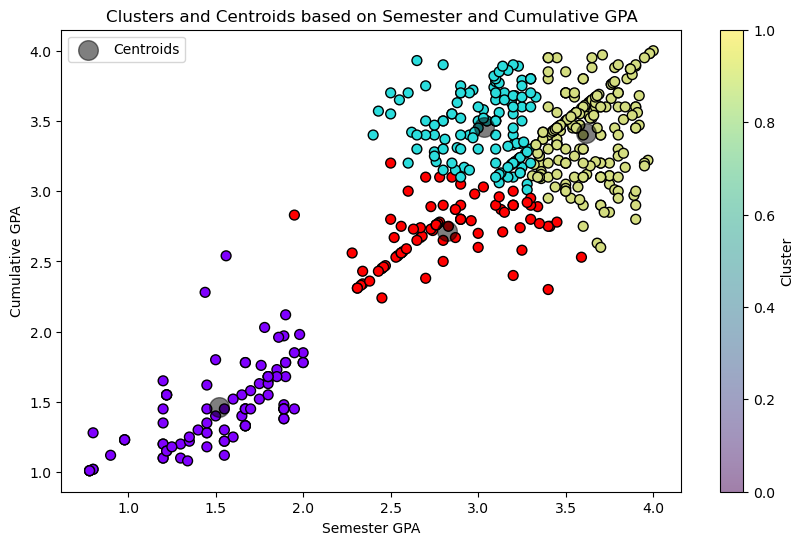

In [10]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you have a CSV file named "student_data.csv"
try:
  # Read the data from a CSV file
  data = pd.read_csv("C:/Users/PC/Downloads/UseforWekaAndRapidminer (2).csv")
except FileNotFoundError:
  print("Error: File 'student_data.csv' not found. Please check the file path.")
  exit()
if set(["Semester GPA", "Cumulative GPA"]).issubset(students_data.columns):
    # K-Means clustering with 4 clusters
    kmeans = KMeans(n_clusters=4, random_state=0)
    identified_clusters = kmeans.fit_predict(students_data[["Semester GPA", "Cumulative GPA"]])
    students_data["Cluster"] = identified_clusters

    # Add cluster centroids to the dataset
    centroids = kmeans.cluster_centers_

    # Print the centroids
    print("Centroids of the clusters are:")
    for i, centroid in enumerate(centroids):
        print(f"Centroid {i}: Semester GPA = {centroid[0]}, Cumulative GPA = {centroid[1]}")

    # Visualization with centroids
    plt.figure(figsize=(10, 6))
    plt.scatter(students_data["Semester GPA"], students_data["Cumulative GPA"], c=students_data["Cluster"], cmap="rainbow", edgecolor='k', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5, label='Centroids')
    plt.title("Clusters and Centroids based on Semester and Cumulative GPA")
    plt.xlabel("Semester GPA")
    plt.ylabel("Cumulative GPA")
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()

#### Evaluation with elbow method
Trying to find a "sweet spot" between number of clusters and the sum of squared error

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

Silhouette Score: 0.45381765401836416
Davies-Bouldin Index: 0.7143149475271535


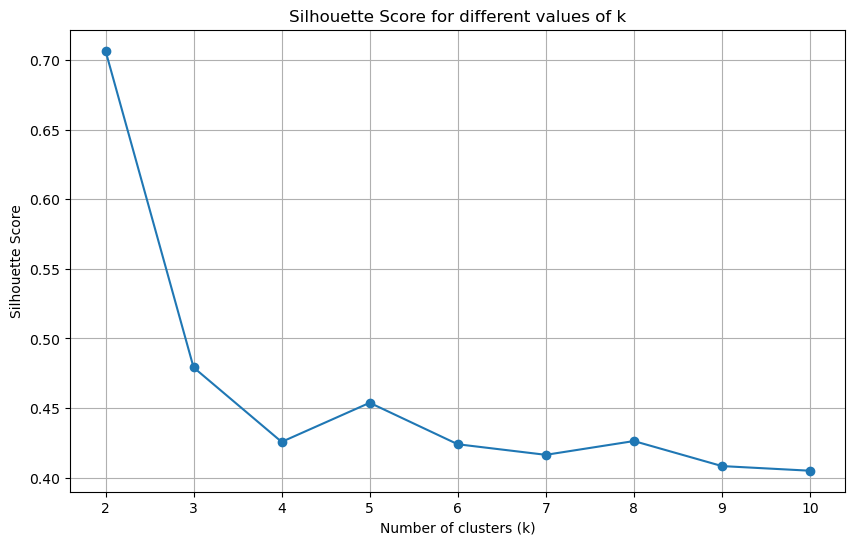

In [5]:
    # Calculate and plot Silhouette Score and Davies-Bouldin Index
    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(students_data[["Semester GPA", "Cumulative GPA"]])
        score = silhouette_score(students_data[["Semester GPA", "Cumulative GPA"]], clusters)
        silhouette_scores.append(score)

    # Final clustering for k=5
    kmeans_final = KMeans(n_clusters=5, random_state=0)
    identified_clusters = kmeans_final.fit_predict(students_data[["Semester GPA", "Cumulative GPA"]])
    silhouette_avg = silhouette_score(students_data[["Semester GPA", "Cumulative GPA"]], identified_clusters)
    db_score = davies_bouldin_score(students_data[["Semester GPA", "Cumulative GPA"]], identified_clusters)

    print("Silhouette Score:", silhouette_avg)
    print("Davies-Bouldin Index:", db_score)

    # Plot Silhouette Score
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for different values of k")
    plt.xticks(range(2, 11))
    plt.grid()
    plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

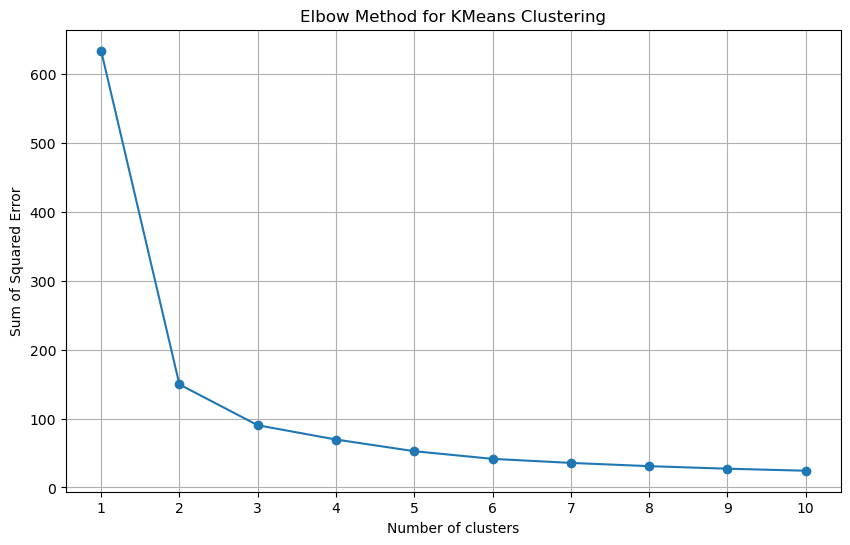

In [16]:
# Plot Elbow Method
sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(students_data[["Semester GPA", "Cumulative GPA"]])
        sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.title("Elbow Method for KMeans Clustering")
plt.grid()
plt.show()


"The sweet spot" from the elbow method is the point, where curve starts to bend. The best value seems to be "3", thus below K-Means algorithm is used again to identify clusters, but this time only three.

#### Comparision of performance of students from different clusters in the exams

In [17]:
good_performance = students_data[students_data["Cluster"] == 0]
poor_performance = students_data[students_data["Cluster"] == 1]
excellent_performance = students_data[students_data["Cluster"] == 2]
average_performance = students_data[students_data["Cluster"] == 3]

C:\Users\PC\AppData\Local\Temp\ipykernel_44776\2492321359.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=excellent_performance['Semester GPA'], label="excellent ", shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_44776\2492321359.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=good_performance['Semester GPA'], label="good", shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_44776\2492321359.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=average_performance['Semester GPA'], label="average", shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_44776\2492321359.py:4: FutureWarning: 

`shad

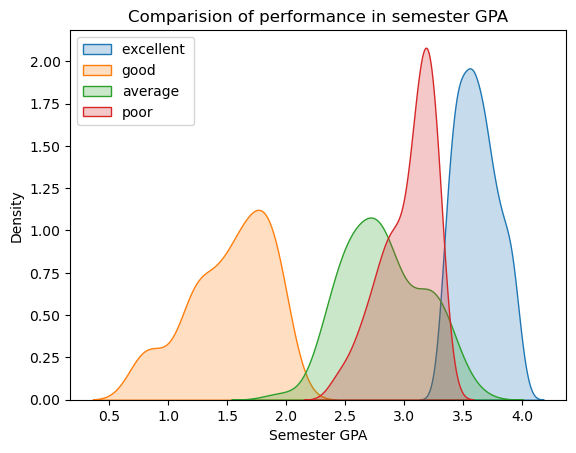

In [18]:
sns.kdeplot(data=excellent_performance['Semester GPA'], label="excellent ", shade=True)
sns.kdeplot(data=good_performance['Semester GPA'], label="good", shade=True)
sns.kdeplot(data=average_performance['Semester GPA'], label="average", shade=True)
sns.kdeplot(data=poor_performance['Semester GPA'], label="poor", shade=True)
plt.title("Comparision of performance in semester GPA")
plt.legend(loc = "upper left")

C:\Users\PC\AppData\Local\Temp\ipykernel_44776\2860088424.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=excellent_performance['Cumulative GPA'], label="excellent ", shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_44776\2860088424.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=good_performance['Cumulative GPA'], label="good ", shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_44776\2860088424.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=poor_performance['Cumulative GPA'], label="poor ", shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_44776\2860088424.py:4: FutureWarning: 

`sh

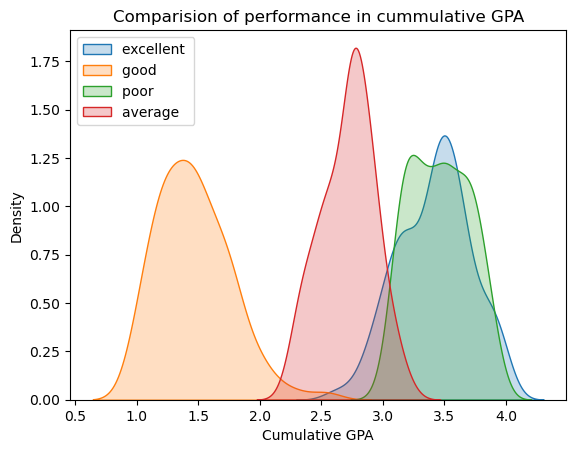

In [19]:
sns.kdeplot(data=excellent_performance['Cumulative GPA'], label="excellent ", shade=True)
sns.kdeplot(data=good_performance['Cumulative GPA'], label="good ", shade=True)
sns.kdeplot(data=poor_performance['Cumulative GPA'], label="poor ", shade=True)
sns.kdeplot(data=average_performance['Cumulative GPA'], label="average ", shade=True)
plt.title("Comparision of performance in cummulative GPA")
plt.legend(loc = "upper left")

#### Cluster characteristics - Students with **excellent performance**
Simple analysis and visualizations to characterize students from excellent_performance cluster

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

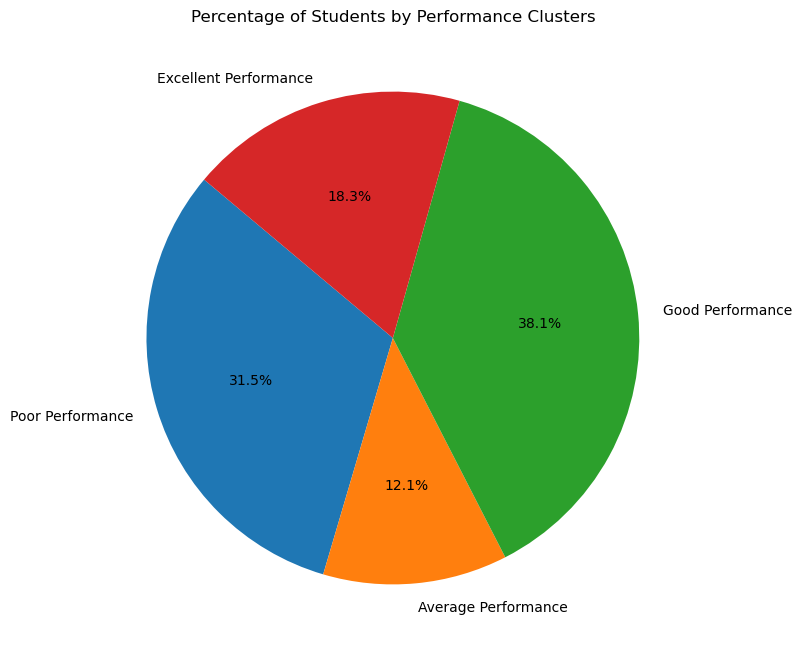

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(students_data.loc[:, ["Semester GPA", "Cumulative GPA"]])
identified_clusters = kmeans.fit_predict(students_data.loc[:, ["Semester GPA", "Cumulative GPA"]])
students_data["Cluster"] = identified_clusters

# Counting the number of students in each cluster
cluster_counts = students_data["Cluster"].value_counts().sort_index()

# Calculating the percentage of students in each cluster
cluster_percentages = cluster_counts / cluster_counts.sum() * 100

# Defining specific labels for the pie chart
performance_labels = ["Poor Performance", "Average Performance", "Good Performance", "Excellent Performance"]

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_percentages, labels=performance_labels, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Students by Performance Clusters")
plt.show()

Text(0.5, 1.0, 'Major analysis')

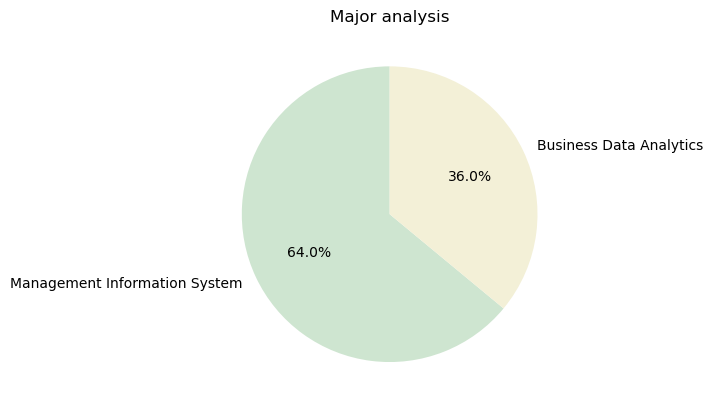

In [26]:
#major analysis
major = [len(excellent_performance[excellent_performance["Major"] == "Business Data Analytics"]), len(excellent_performance[excellent_performance["Major"] == "Management Information System"])]

plt.pie(major, labels = ["Management Information System","Business Data Analytics" ], colors = ["#CEE5D0", "#F3F0D7"], autopct = '%1.1f%%', startangle = 90)
plt.title("Major analysis")


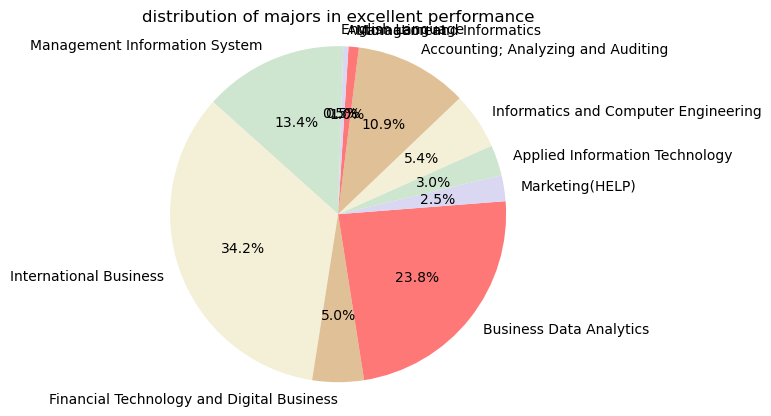

In [27]:
#lay danh sach cac chuyen nganh duy nhat trong tap du lieu excellent
major = excellent_performance["Major"].unique()
#tinh so luong sinh vien xuat sac trong moi chuyen nganh
major_share = [len(excellent_performance[excellent_performance["Major"] == group]) for group in major]
#ve bieu do tron the hien ty le tung chuyen nganh

colors = ["#CEE5D0", "#F3F0D7", "#E0C097", "#FF7878", "#D9D7F1"][:len(major_share)]
#them tieu de cho bieu do
plt.pie(major_share, labels=major, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("distribution of majors in excellent performance")
 #hien thi bieu do
plt.show()

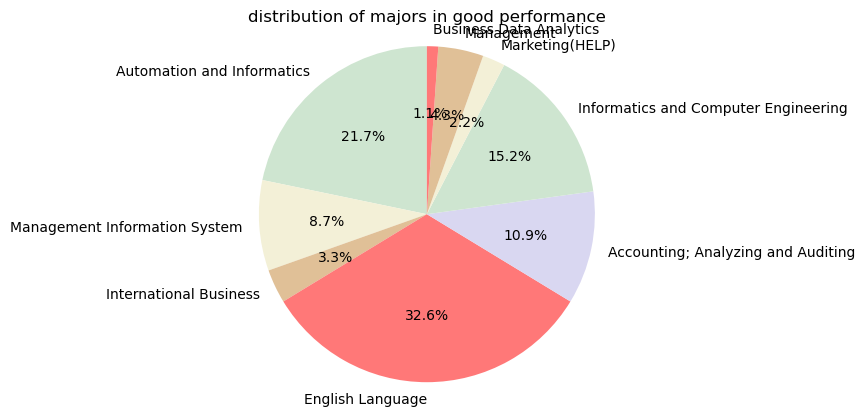

In [21]:
#lay danh sach cac chuyen nganh duy nhat trong tap du lieu excellent
major = good_performance["Major"].unique()
#tinh so luong sinh vien xuat sac trong moi chuyen nganh
major_share = [len(good_performance[good_performance["Major"] == group]) for group in major]
#ve bieu do tron the hien ty le tung chuyen nganh

colors = ["#CEE5D0", "#F3F0D7", "#E0C097", "#FF7878", "#D9D7F1"][:len(major_share)]
#them tieu de cho bieu do
plt.pie(major_share, labels=major, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("distribution of majors in good performance")
 #hien thi bieu do
plt.show()

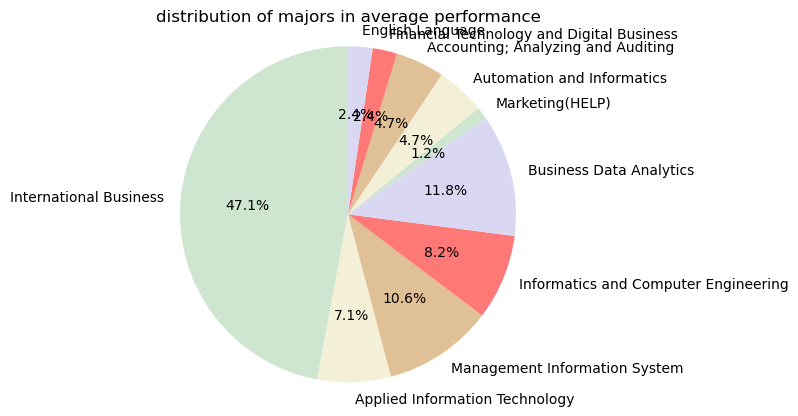

In [22]:
#lay danh sach cac chuyen nganh duy nhat trong tap du lieu excellent
major = average_performance["Major"].unique()
#tinh so luong sinh vien xuat sac trong moi chuyen nganh
major_share = [len(average_performance[average_performance["Major"] == group]) for group in major]
#ve bieu do tron the hien ty le tung chuyen nganh

colors = ["#CEE5D0", "#F3F0D7", "#E0C097", "#FF7878", "#D9D7F1"][:len(major_share)]
#them tieu de cho bieu do
plt.pie(major_share, labels=major, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("distribution of majors in average performance")
 #hien thi bieu do
plt.show()

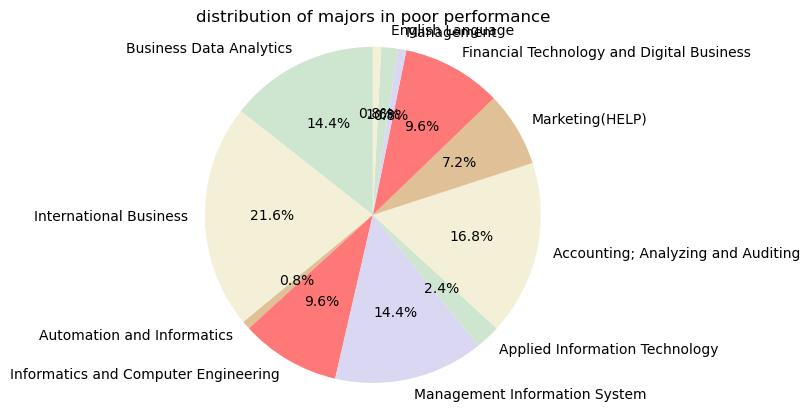

In [23]:
#lay danh sach cac chuyen nganh duy nhat trong tap du lieu excellent
major = poor_performance["Major"].unique()
#tinh so luong sinh vien xuat sac trong moi chuyen nganh
major_share = [len(poor_performance[poor_performance["Major"] == group]) for group in major]
#ve bieu do tron the hien ty le tung chuyen nganh

colors = ["#CEE5D0", "#F3F0D7", "#E0C097", "#FF7878", "#D9D7F1"][:len(major_share)]
#them tieu de cho bieu do
plt.pie(major_share, labels=major, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("distribution of majors in poor performance")
 #hien thi bieu do
plt.show()

In [54]:
poor_performance.describe()

,No,Student ID,Semester GPA,Cumulative GPA,Cluster
count,91.000000,9.100000e+01,91.000000,91.000000,91.0
mean,248.868132,2.119436e+07,1.518571,1.452967,1.0
std,149.494869,5.123064e+05,0.347546,0.280252,0.0
min,3.000000,2.007232e+07,0.780000,1.010000,1.0
25%,117.500000,2.107012e+07,1.220000,1.230000,1.0
50%,241.000000,2.107452e+07,1.600000,1.450000,1.0
75%,370.000000,2.107765e+07,1.800000,1.650000,1.0
max,502.000000,2.307074e+07,2.000000,2.280000,1.0


### Conclusions
* Optimal number of clusters in case of math and reading score classification was three.
* Students were classified into groups of excellent, good and poor performance
* KDE plots show difference between student performance from those clusters.
    * excellent performace is usually around 85%, good 65%, poor 35%

##### Characteristics of students with excellent performance
Students with excellent performance are usually female and had standard lunch. Students from this cluster are divided "half/half", when it comes to preparation course. Parents of 26,6% students have associate's degree and the biggest shares of ethnicity among the students have group C, D and E. 

